In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("Kangaroo_cleaned_withoutimpurity.csv") # Load a CSV

## Data analysis


 Linear correlation


In [53]:
df_cleaned.shape

(76370, 40)

In [54]:
# Compute Pearson correlation of every numeric column with price
corr_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

# View top positive and negative correlations
print("Top positive correlations:\n", corr_with_price.head(10))
print("\nTop negative correlations:\n", corr_with_price.tail(10))

Top positive correlations:
 price               1.000000
bedroomCount        0.377437
terraceSurface      0.236967
landSurface         0.226146
facedeCount         0.167203
bathroomCount       0.111059
gardenSurface       0.099387
habitableSurface    0.097872
toiletCount         0.095787
roomCount           0.088276
Name: price, dtype: float64

Top negative correlations:
 roomCount                   0.088276
buildingConstructionYear    0.032558
livingRoomSurface           0.031861
kitchenSurface              0.021199
streetFacadeWidth           0.009624
parkingCountOutdoor         0.008926
floorCount                 -0.001798
parkingCountIndoor         -0.002719
postCode                   -0.042046
id                         -0.051982
Name: price, dtype: float64


In [55]:
numeric_df = df.select_dtypes(include=[np.number])

# 2) Compute the correlation matrix
corr_matrix = numeric_df.corr()

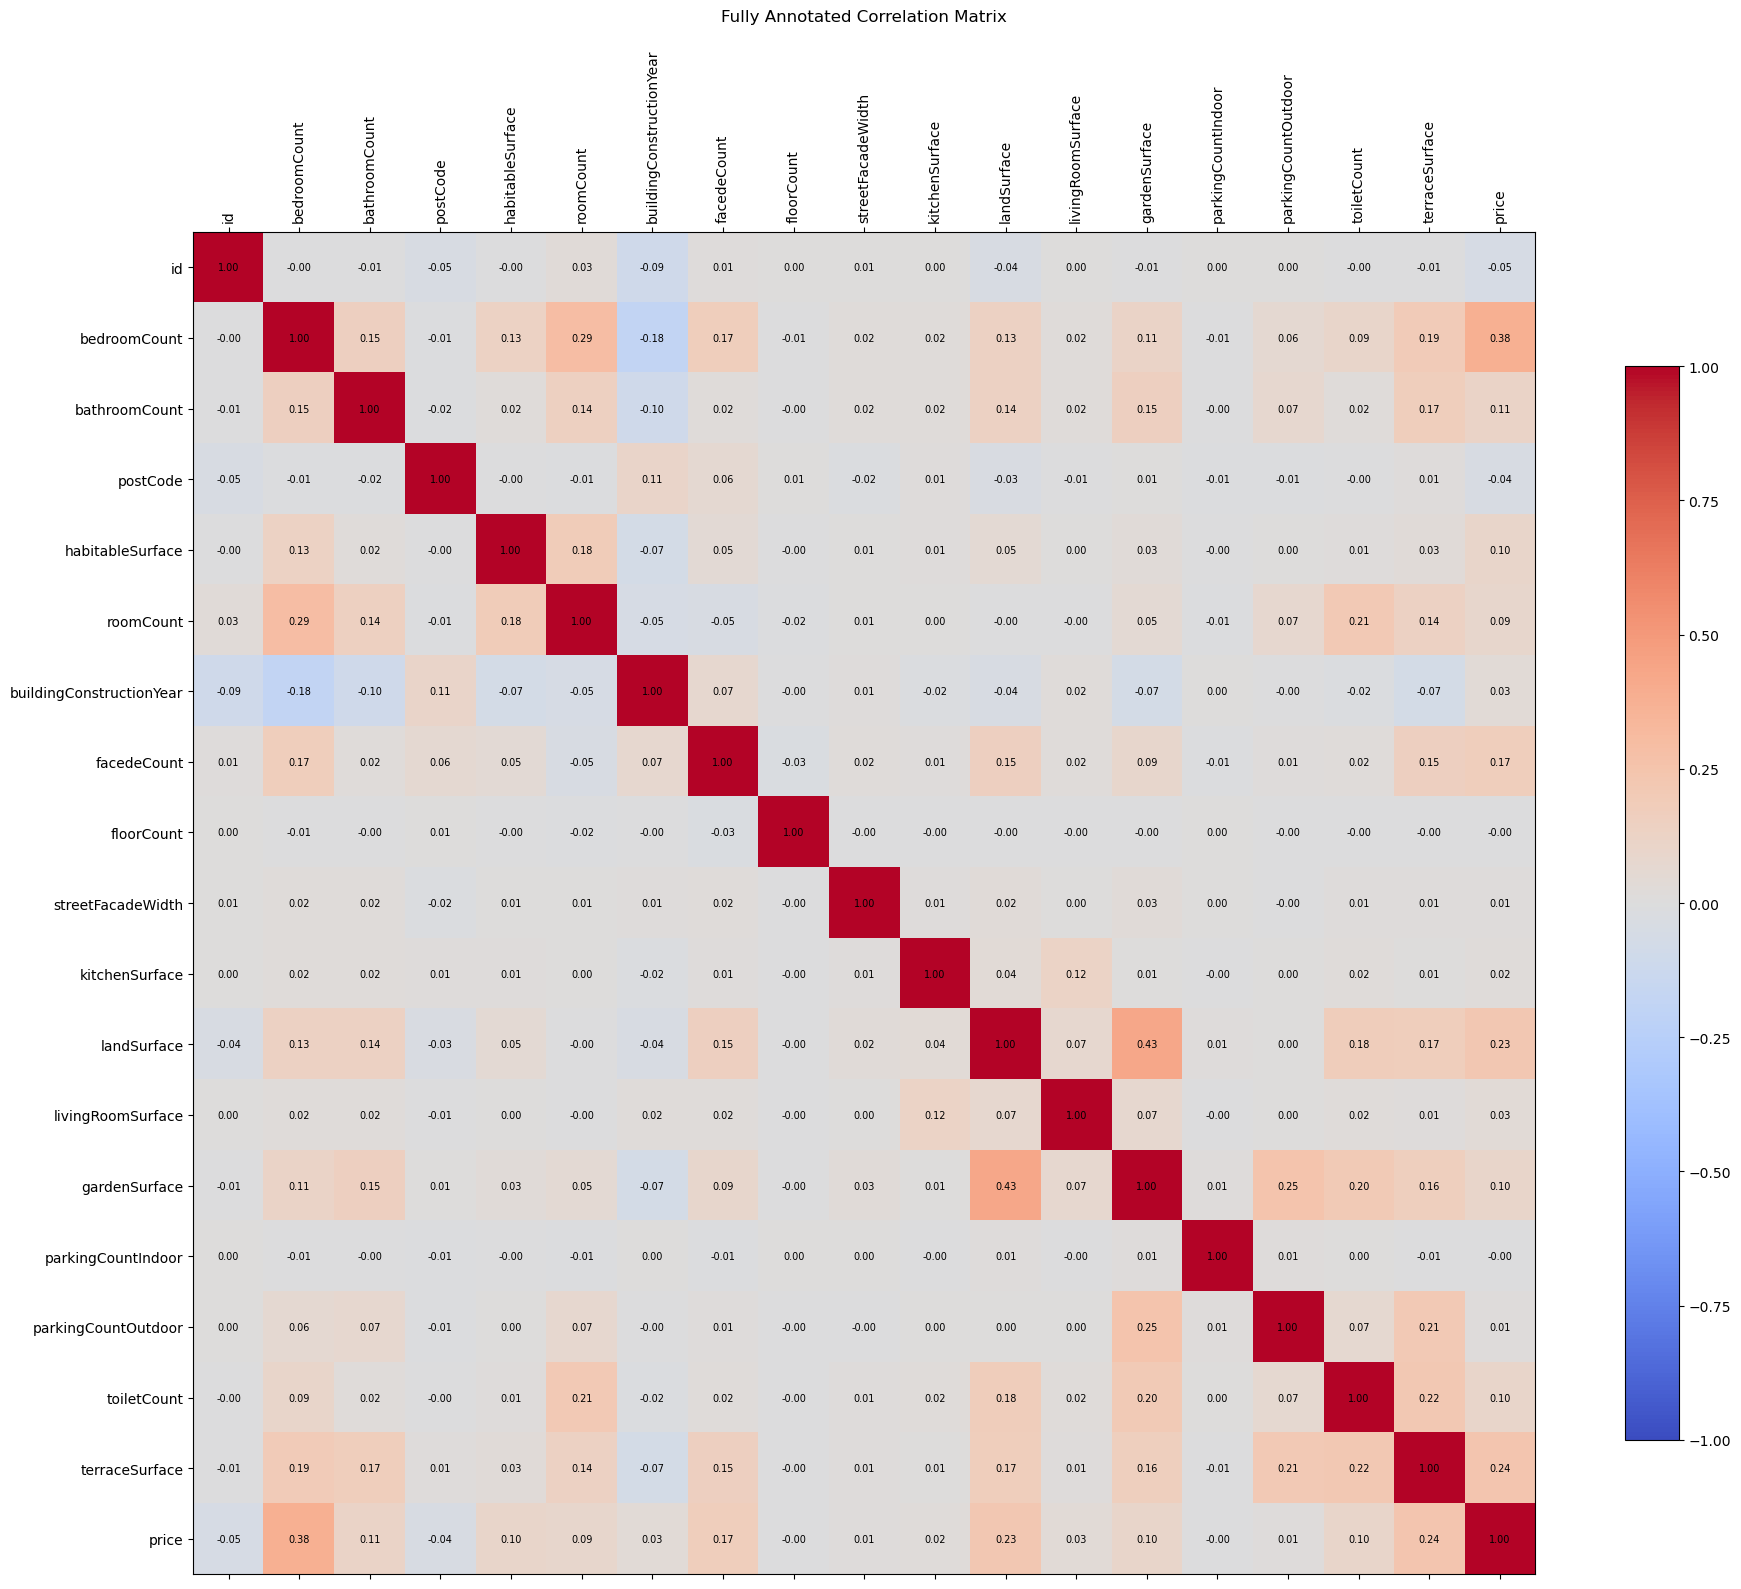

In [56]:
fig, ax = plt.subplots(figsize=(20,16))
cax = ax.matshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, shrink=0.8)

# tick labels
ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# manual annotation loop
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=7)

plt.title("Fully Annotated Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

In [57]:
most_influential = corr_with_price.abs().sort_values(ascending=False).index[1:6]
least_influential = corr_with_price.abs().sort_values(ascending=True).index[:5]

print("Top 5 most influential:", most_influential.tolist())
print("Top 5 least influential:", least_influential.tolist())

Top 5 most influential: ['bedroomCount', 'terraceSurface', 'landSurface', 'facedeCount', 'bathroomCount']
Top 5 least influential: ['floorCount', 'parkingCountIndoor', 'parkingCountOutdoor', 'streetFacadeWidth', 'kitchenSurface']


In [58]:
# Quantitative = numeric types
quant_cols = df.select_dtypes(include=['number']).columns.tolist()
# Qualitative = object / category types
qual_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Quantitative ({len(quant_cols)}): {quant_cols}")
print(f"Qualitative ({len(qual_cols)}): {qual_cols}")

Quantitative (19): ['id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'roomCount', 'buildingConstructionYear', 'facedeCount', 'floorCount', 'streetFacadeWidth', 'kitchenSurface', 'landSurface', 'livingRoomSurface', 'gardenSurface', 'parkingCountIndoor', 'parkingCountOutdoor', 'toiletCount', 'terraceSurface', 'price']
Qualitative (21): ['type', 'subtype', 'province', 'locality', 'hasAttic', 'hasBasement', 'hasDiningRoom', 'buildingCondition', 'hasLift', 'floodZoneType', 'heatingType', 'hasPhotovoltaicPanels', 'kitchenType', 'hasLivingRoom', 'hasGarden', 'hasVisiophone', 'hasOffice', 'hasSwimmingPool', 'hasTerrace', 'terraceOrientation', 'epcScore']


In [62]:
missing_count = df.isnull().sum()
missing_pct   = (missing_count / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct'  : missing_pct
}).sort_values('missing_pct', ascending=False)

print(missing_summary.head(10))  # top 10 most-missing

                       missing_count  missing_pct
hasSwimmingPool                74554        97.62
hasPhotovoltaicPanels          68322        89.46
hasOffice                      65985        86.40
terraceOrientation             65108        85.25
hasAttic                       63856        83.61
hasDiningRoom                  62231        81.49
streetFacadeWidth              60860        79.69
gardenSurface                  60413        79.11
hasGarden                      60413        79.11
hasVisiophone                  60379        79.06


1. Price Distribution: To understand price spread and detect outliers

c:\Users\Dieu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


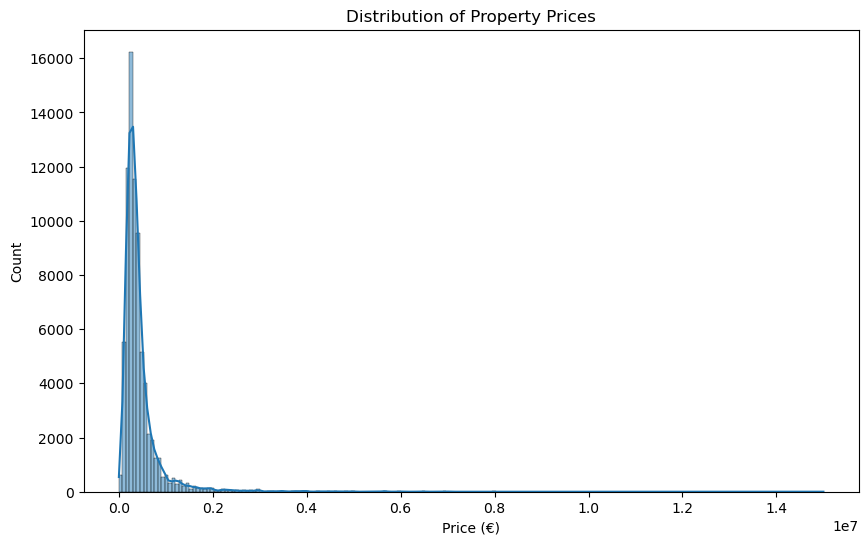

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=200, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

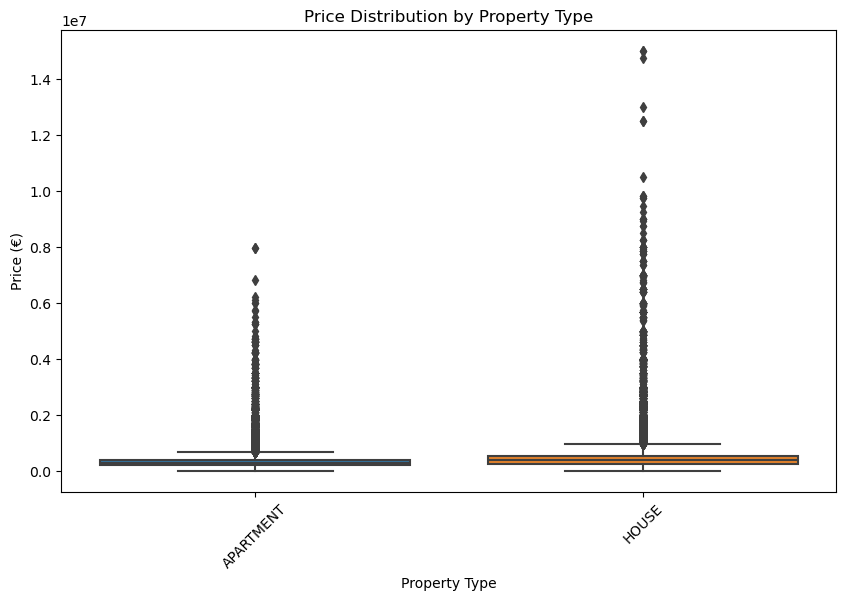

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='price', data=df)
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price (€)")
plt.xticks(rotation=45)
plt.show()

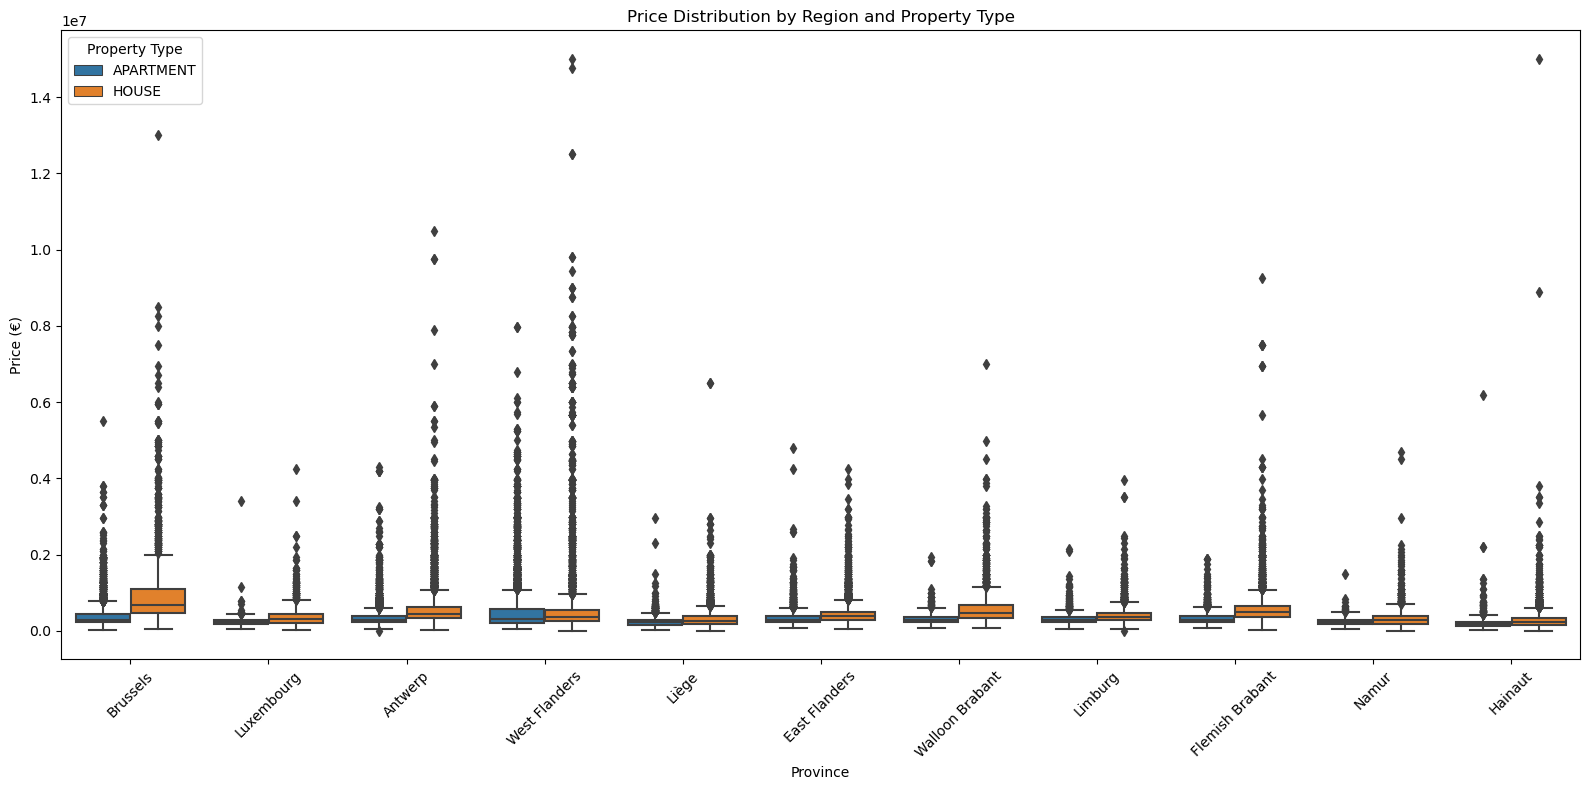

In [66]:
plt.figure(figsize=(16,8))
sns.boxplot(
    data=df_cleaned,
    x='province',        
    y='price',
    hue='type'  # this separates house and apartment
)
plt.title("Price Distribution by Region and Property Type")
plt.xlabel("Province")
plt.ylabel("Price (€)")
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

### Non-linear correlation
- Spearman Rank Correlation

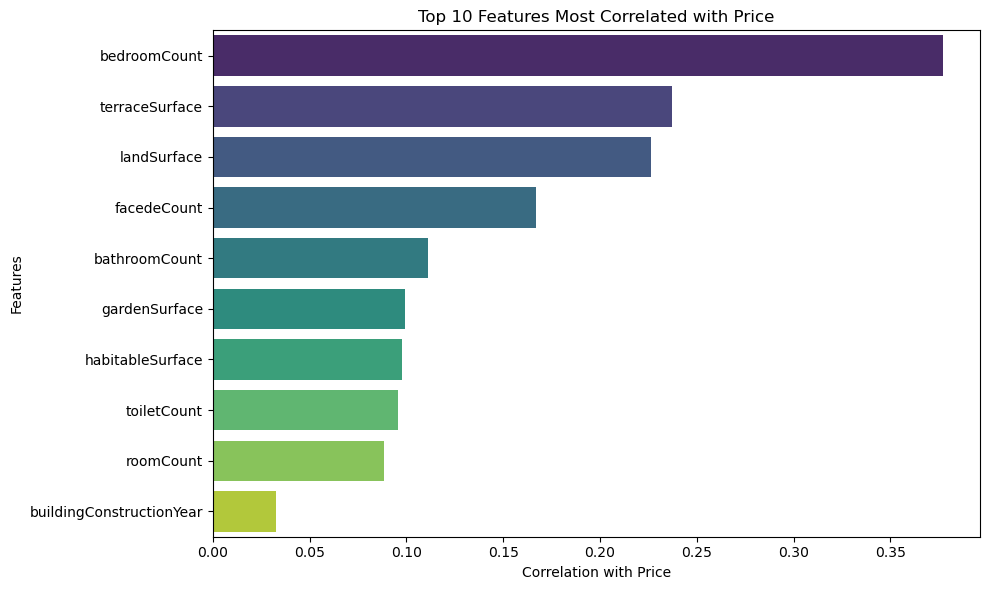

In [67]:
top_corr = corr_matrix['price'].drop('price').sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Features Most Correlated with Price')
plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

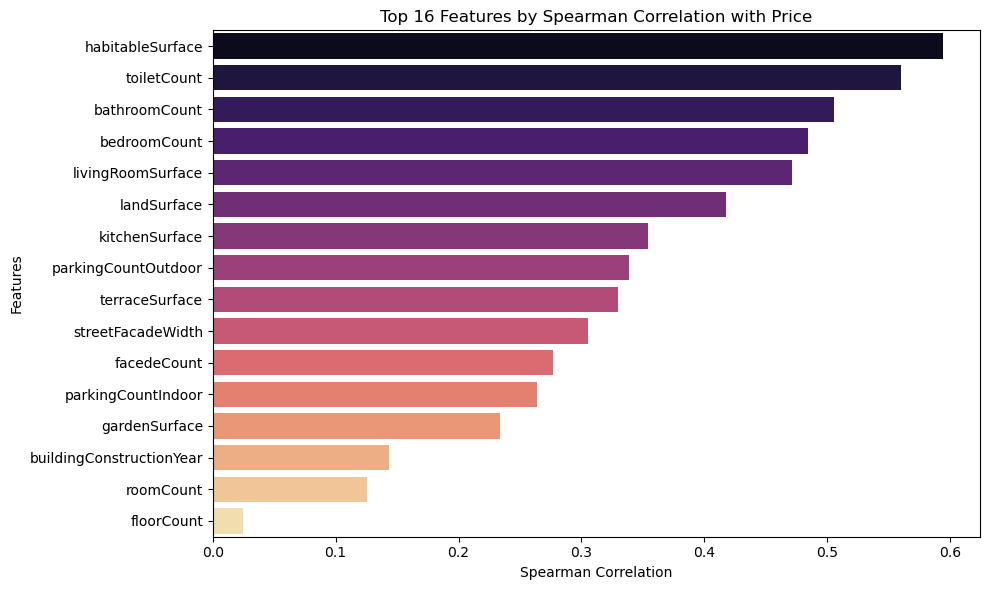

In [68]:
spearman_corr = numeric_df.corr(method='spearman')

# Top 7 features by Spearman correlation
top_spearman = spearman_corr['price'].drop('price').sort_values(ascending=False).head(16)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman.values, y=top_spearman.index, palette='magma')
plt.title('Top 16 Features by Spearman Correlation with Price')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

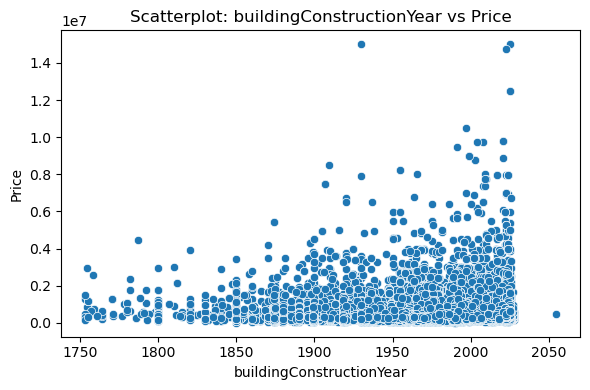

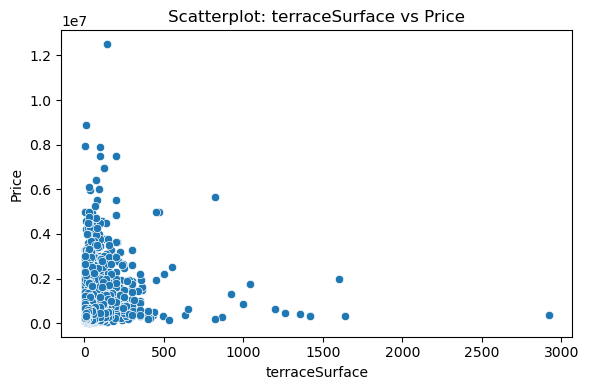

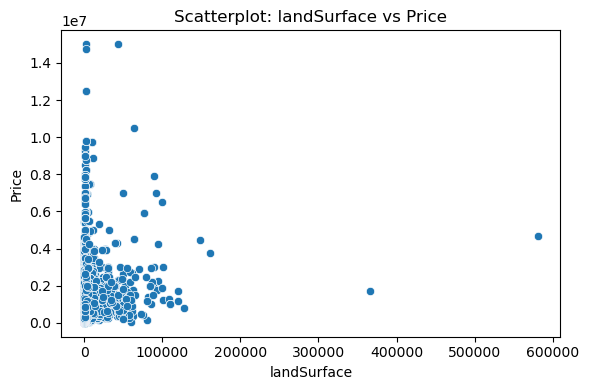

In [69]:
#Scatterplots for Visual Inspection
# For a few features (pick ones with low Pearson but possible importance)
features_to_check = ['buildingConstructionYear', 'terraceSurface', 'landSurface']

for feature in features_to_check:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=numeric_df[feature], y=numeric_df['price'])
    plt.title(f"Scatterplot: {feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

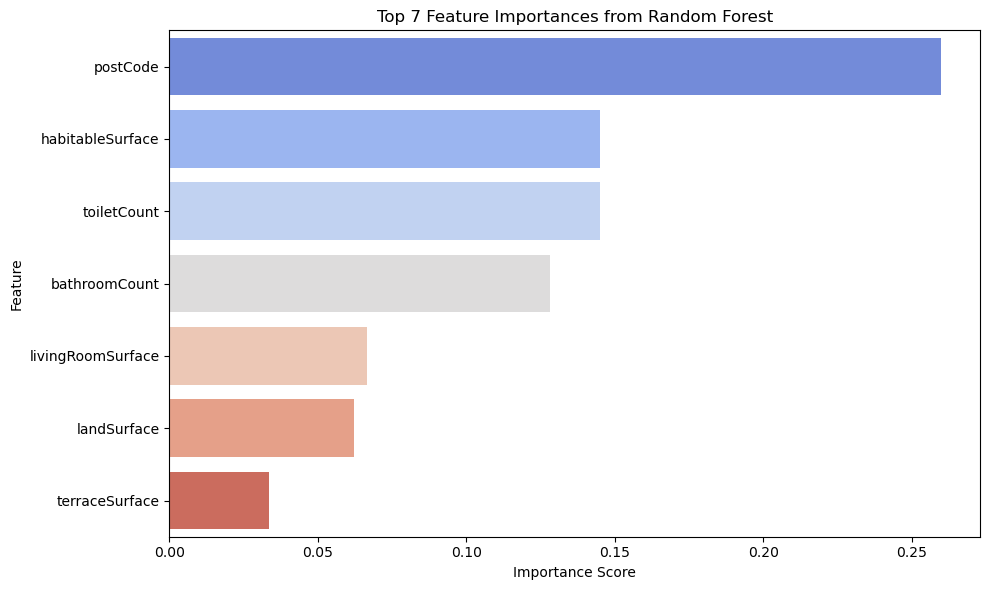

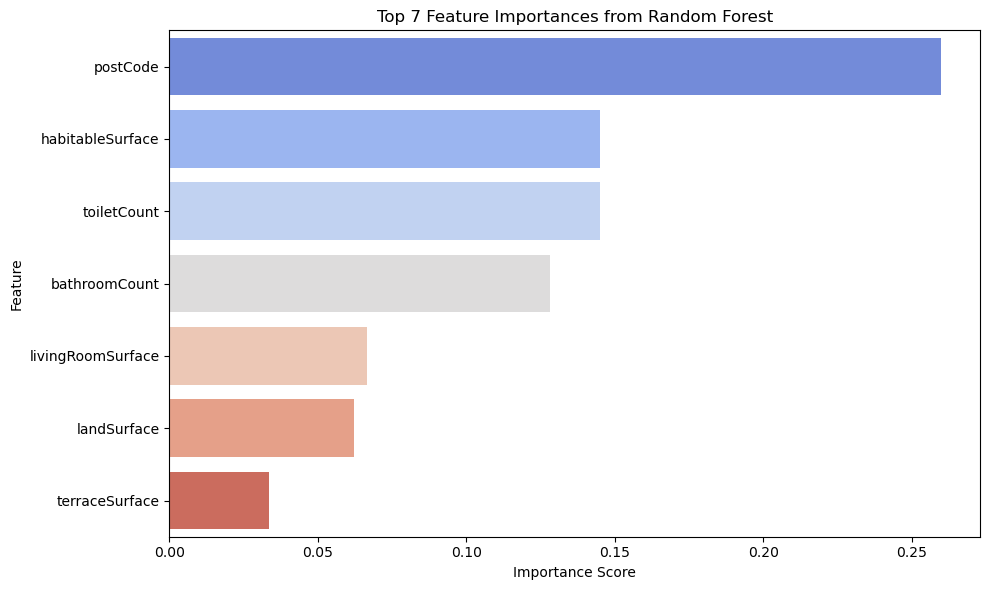

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select numeric features and remove missing values
X = numeric_df.drop(columns='price').dropna()
y = numeric_df.loc[X.index, 'price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(7)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title("Top 7 Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


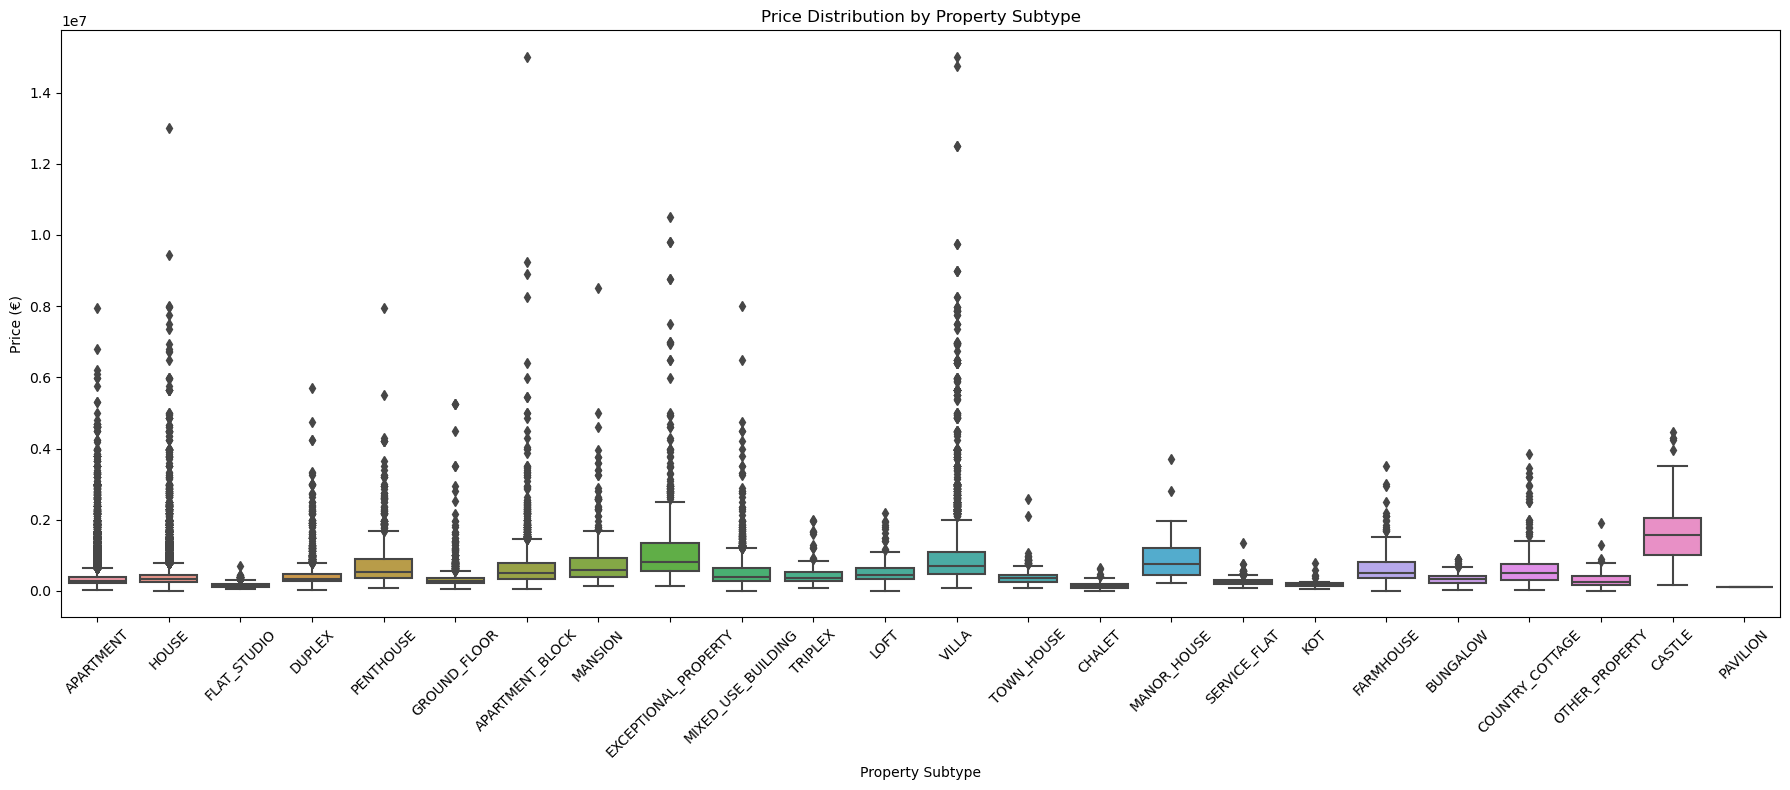

In [74]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='subtype', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Property Subtype")
plt.xlabel("Property Subtype")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()